In [11]:
from skimage import io, viewer
from PIL import Image
img = io.imread('image.jpg', as_gray=True)  # load the image as grayscale
print('image matrix size: ', img.shape )     # print the size of image
print('\n First 5 columns and rows of the image matrix: \n', img[:5,:5]*255) 
viewer.ImageViewer(img).show()    

image matrix size:  (897, 1168)

 First 5 columns and rows of the image matrix: 
 [[ 88.  85.  82.  80.  81.]
 [ 88.  85.  88.  85.  84.]
 [ 81.  81.  87.  86.  83.]
 [ 86.  87.  88.  87.  83.]
 [ 86.  90.  85.  86.  83.]]


[]

C:\Users\forqzy\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\skimage\util\dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


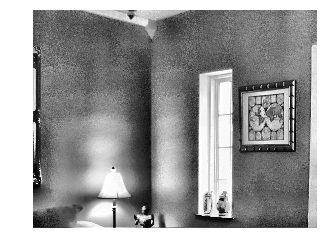


 First 5 columns and rows of the image_sharpen matrix: 
 [[ 267.  170.  157.  152.  160.]
 [ 186.   83.  101.   87.   86.]
 [ 150.   65.   92.   88.   74.]
 [ 176.   90.   94.   92.   75.]
 [ 172.  105.   79.   91.   77.]]


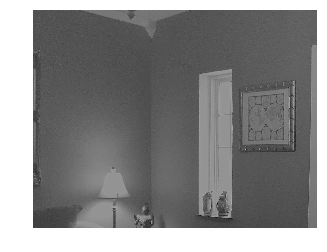

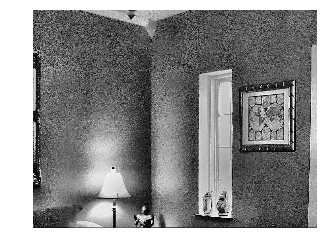

In [3]:
from skimage import io, color
import matplotlib.pyplot as plt
import numpy as np
from skimage import exposure
import pylab
def convolve2d(image, kernel):
    # This function which takes an image and a kernel 
    # and returns the convolution of them
    # Args:
    #   image: a numpy array of size [image_height, image_width].
    #   kernel: a numpy array of size [kernel_height, kernel_width].
    # Returns:
    #   a numpy array of size [image_height, image_width] (convolution output).
    
    kernel = np.flipud(np.fliplr(kernel))    # Flip the kernel
    output = np.zeros_like(image)            # convolution output
    # Add zero padding to the input image
    image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))   
    image_padded[1:-1, 1:-1] = image
    for x in range(image.shape[1]):     # Loop over every pixel of the image
        for y in range(image.shape[0]):
            # element-wise multiplication of the kernel and the image
            output[y,x]=(kernel*image_padded[y:y+3,x:x+3]).sum()        
    return output
img = io.imread('image.jpg')    # Load the image
img = color.rgb2gray(img)       # Convert the image to grayscale (1 channel)
# Adjust the contrast of the image by applying Histogram Equalization 
image_equalized = exposure.equalize_adapthist(img/np.max(np.abs(img)), clip_limit=0.03)
plt.imshow(image_equalized, cmap=plt.cm.gray)
plt.axis('off')
plt.show()
# Convolve the sharpen kernel and the image
kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
image_sharpen = convolve2d(img,kernel)
print ('\n First 5 columns and rows of the image_sharpen matrix: \n', image_sharpen[:5,:5]*255)
# Plot the filtered image
plt.imshow(image_sharpen, cmap=plt.cm.gray)
plt.axis('off')
plt.show()
print("Sharpened image")
# Adjust the contrast of the filtered image by applying Histogram Equalization 
image_sharpen_equalized = exposure.equalize_adapthist(image_sharpen/np.max(np.abs(image_sharpen)), clip_limit=0.03)
plt.imshow(image_sharpen_equalized, cmap=plt.cm.gray)
plt.axis('off')
plt.show()
print("Sharpened image after Histogram Equalization")


 First 5 columns and rows of the image_sharpen matrix: 
 [[ 267.  170.  157.  152.  160.]
 [ 186.   83.  101.   87.   86.]
 [ 150.   65.   92.   88.   74.]
 [ 176.   90.   94.   92.   75.]
 [ 172.  105.   79.   91.   77.]]


C:\Users\forqzy\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\skimage\util\dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


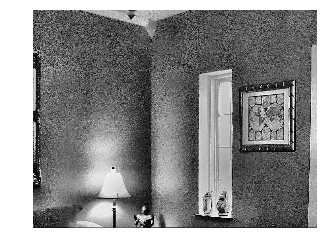

In [6]:
import numpy as np
import scipy
from skimage import io, color
from skimage import exposure
import matplotlib.pyplot as plt
img = io.imread('image.jpg')    # Load the image
img = color.rgb2gray(img)       # Convert the image to grayscale (1 channel)
kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
# you can use 'valid' instead of 'same', then it will not add zero padding
image_sharpen = scipy.signal.convolve2d(img, kernel, 'same')
print ('\n First 5 columns and rows of the image_sharpen matrix: \n', image_sharpen[:5,:5]*255)
# Adjust the contrast of the filtered image by applying Histogram Equalization 
image_sharpen_equalized = exposure.equalize_adapthist(image_sharpen/np.max(np.abs(image_sharpen)), clip_limit=0.03)
plt.imshow(image_sharpen_equalized, cmap=plt.cm.gray)
plt.axis('off')
plt.show()


 First 5 columns and rows of the image_edge matrix: 
 [[ 267.  170.  157.  152.  160.]
 [ 186.   83.  101.   87.   86.]
 [ 150.   65.   92.   88.   74.]
 [ 176.   90.   94.   92.   75.]
 [ 172.  105.   79.   91.   77.]]


C:\Users\forqzy\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\skimage\util\dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


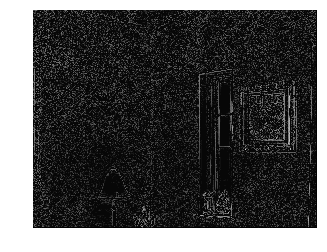

In [8]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
from skimage import io, color
from skimage import exposure
img = io.imread('image.jpg')    # Load the image
img = color.rgb2gray(img)       # Convert the image to grayscale (1 channel)
kernel = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
# we use 'valid' which means we do not add zero padding to our image
edges = scipy.signal.convolve2d(img, kernel, 'valid')
print( '\n First 5 columns and rows of the image_edge matrix: \n', image_sharpen[:5,:5]*255)
# Adjust the contrast of the filtered image by applying Histogram Equalization
edges_equalized = exposure.equalize_adapthist(edges/np.max(np.abs(edges)), clip_limit=0.03)
plt.imshow(edges_equalized, cmap=plt.cm.gray)    # plot the edges_clipped
plt.axis('off')
plt.show()

C:\Users\forqzy\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\skimage\util\dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


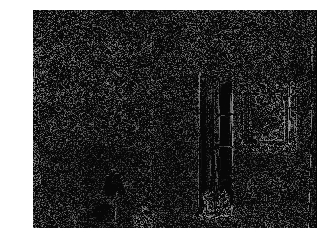

In [9]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
from skimage import io, color
from skimage import exposure
img = io.imread('image.jpg')    # Load the image
img = color.rgb2gray(img)       # Convert the image to grayscale (1 channel)
# apply sharpen filter to the original image
sharpen_kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
image_sharpen = scipy.signal.convolve2d(img, sharpen_kernel, 'valid')
edge_kernel = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
edges = scipy.signal.convolve2d(image_sharpen, edge_kernel, 'valid')
# Adjust the contrast of the filtered image by applying Histogram Equalization
edges_equalized = exposure.equalize_adapthist(edges/np.max(np.abs(edges)), clip_limit=0.03)
plt.imshow(edges_equalized, cmap=plt.cm.gray)    # plot the edges_clipped
plt.axis('off')
plt.show()

C:\Users\forqzy\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\skimage\util\dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


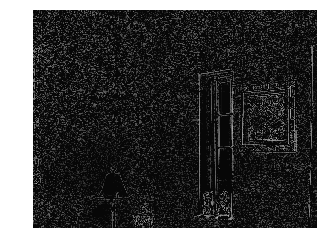

In [10]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
from skimage import io, color
from skimage import exposure
img = io.imread('image.jpg')    # Load the image
img = color.rgb2gray(img)       # Convert the image to grayscale (1 channel)
# apply sharpen filter to the original image
sharpen_kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
image_sharpen = scipy.signal.convolve2d(img, sharpen_kernel, 'valid')
# apply edge detection filter to the sharpen image
edge_kernel = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
edges = scipy.signal.convolve2d(image_sharpen, edge_kernel, 'valid')
# apply blur filter to the edge detection filtered image
blur_kernel = np.array([[1,1,1],[1,1,1],[1,1,1]])/9.0;
denoised = scipy.signal.convolve2d(edges, blur_kernel, 'valid')
# Adjust the contrast of the filtered image by applying Histogram Equalization
denoised_equalized = exposure.equalize_adapthist(denoised/np.max(np.abs(denoised)), clip_limit=0.03)
plt.imshow(denoised_equalized, cmap=plt.cm.gray)    # plot the denoised_clipped
plt.axis('off')
plt.show()